In [16]:
import rasterio
import os,sys
import matplotlib.pyplot as plt
import numpy as np
from rasterio.enums import Resampling
from rasterio.transform import from_bounds
from rasterio.windows import from_bounds as window_from_bounds

In [2]:
Kyfile = '/home/stewells/arch_tmp/20250316/nowcast_cores_unet_20250316_1500_1hr_KY_4326.tif'
Zafile = '/home/stewells/arch_tmp/20250316/nowcast_cores_unet_20250316_1500_1hr_ZA_4326.tif'

In [8]:
tif_files = [Zafile,Kyfile]

In [79]:
# Open all datasets
datasets = [rasterio.open(f) for f in tif_files]

# Determine output bounds (maximum extent)
lefts, bottoms, rights, tops = zip(*[dataset.bounds for dataset in datasets])
min_left, min_bottom = min(lefts), min(bottoms)
max_right, max_top = max(rights), max(tops)
# Calculate output transform and dimensions
resolution = datasets[0].res[0]  # Assuming uniform resolution
width = int((max_right - min_left) / resolution)
height = int((max_top - min_bottom) / resolution)
transform = from_bounds(min_left, min_bottom, max_right, max_top, width, height)

# Create an empty array filled with NaN
combined_data = np.full((height, width), np.nan, dtype='float32')

In [80]:
dataset = datasets[0]
window = window_from_bounds(*dataset.bounds, transform=transform)
win_height = int(window.height)
win_width = int(window.width)
data = dataset.read(out_shape=(dataset.count, win_height, win_width), window=window, resampling=Resampling.nearest)
data = dataset.read(1)
row_off, col_off = int(window.row_off), int(window.col_off)
#data = dataset.read(1)

In [92]:
row_off, col_off = int(window.row_off), int(window.col_off)
    
# Identify valid data points and place them in the combined array
valid_mask = ~np.isnan(data)

combined_data[row_off:row_off + win_height+1, col_off:col_off + win_width+1] = np.where(
    valid_mask, 
    data, 
    combined_data[row_off:row_off + win_height+1, col_off:col_off + win_width+1]
)

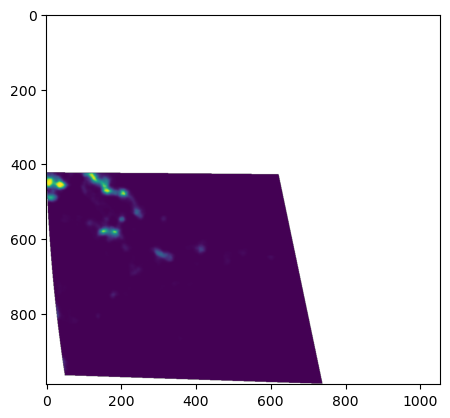

In [94]:
plt.imshow(combined_data[:,:])

In [ ]:

# Open all datasets
datasets = [rasterio.open(f) for f in tif_files]

# Determine output bounds (maximum extent)
lefts, bottoms, rights, tops = zip(*[dataset.bounds for dataset in datasets])
min_left, min_bottom = min(lefts), min(bottoms)
max_right, max_top = max(rights), max(tops)
# Calculate output transform and dimensions
resolution = datasets[0].res[0]  # Assuming uniform resolution
width = int((max_right - min_left) / resolution)
height = int((max_top - min_bottom) / resolution)
transform = from_bounds(min_left, min_bottom, max_right, max_top, width, height)

# Create an empty array filled with NaN
combined_data = np.full((height, width), np.nan, dtype='float32')


# Place each dataset in the combined data array
for dataset in datasets:
    window = window_from_bounds(*dataset.bounds, transform=transform)
    win_height = int(window.height)
    win_width = int(window.width)
    data = dataset.read(out_shape=(dataset.count, win_height, win_width), window=window, resampling=Resampling.nearest)
    data = dataset.read(1)
    row_off, col_off = int(window.row_off), int(window.col_off)
    
    # Identify valid data points and place them in the combined array
    valid_mask = ~np.isnan(data)

    combined_data[row_off:row_off + win_height+1, col_off:col_off + win_width+1] = np.where(
        valid_mask, 
        data, 
        combined_data[row_off:row_off + win_height+1, col_off:col_off + win_width+1]
    )

# Write output file
out_meta = datasets[0].meta.copy()
out_meta.update({
    "height": height,
    "width": width,
    "transform": transform
})

with rasterio.open(output_file, "w", **out_meta) as dest:
    dest.write(combined_data)
return combined_data
# Close datasets
for dataset in datasets:
    dataset.close()

In [23]:
x=merge_geotiffs(tif_files, 'test.tif')

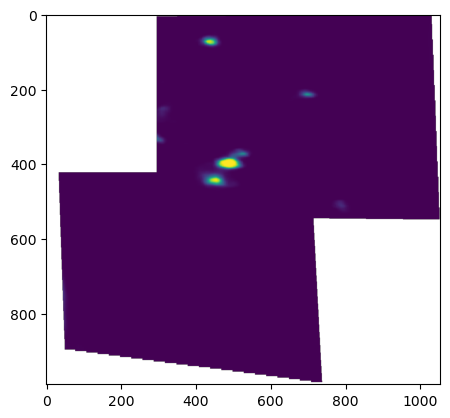

In [30]:
plt.imshow(x[0,:,:])